# Sales Data Analysis  

**by Jayesh Suryawanshi**  

The following is a detailed analysis of Sales Data for different months of 2019.

# STEP 1: Importing and Reading the Data

In [1]:
#Start by importing all the required libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Since the dataset consists of multiples files, each representing the data for a separate month, we need to combine the data into a single file and then read it into a dataframe.

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([df, current_data])

    
df.to_csv("combined_data.csv", index=False)


# Step 2: Understanding the data

In [3]:
df.shape        #Helps to identify the number of rows and columns

(186850, 6)

In [4]:
df.head()       #This step returns the first 5 rows of the dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.columns      #Specifies names of all columns present

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
df.dtypes       #Specifies the data types of each column

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df.info()        #The above two steps can be performed together using this single statement

#Provides a bried information including number of non null values, data types of each column, etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

From the above steps, we find out that there are a total of 6 columns and 186850 rows in the dataframe.  

There are 545 null values present in the dataset for each row

It can also be seen that the data types for columns namely 'Order ID', 'Quantity Ordered', 'Price Each' and 'Order Date' do not match the data they specify.

# Step 3: Data Preparation, Cleaning, Manipulation

We start by dropping the null rows present in the dataframe and reset the index to match the new shape

In [9]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [10]:
df.shape

(186305, 6)

The shape of the dataframe thus changes as the number of rows reduce from 186850 to 186305

In [11]:
df[~df['Order ID'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Here it can be seen that the **column headers are present as rows** at multiple instances. The reason for this is when we merged multiple files of data into one, each file had column headers which upon merging became rows. We drop these instances so that we can change columns' data types into the data they represent.

In [12]:
df.drop(df[df['Order ID'] == "Order ID"].index,inplace=True)
df.reset_index(inplace=True,drop=True)

In [13]:
df = df.astype({'Order ID':'int','Quantity Ordered':'int','Price Each':'float','Order Date':'datetime64[ns]'})

We create a new column called **Sales** for future using during analysis

In [14]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

We also spit the **Purchase Address** column into separate **Street, State, City & Pincode** columns. We then drop the **Purchase Address** column.

In [15]:
# df['Purchase Address'].str.split(',').str[2].str.split(' ')
df['Street'] = df['Purchase Address'].str.split(',').str[0]
df['City'] = df['Purchase Address'].str.split(',').str[1].str[1:]
df['State'] = df['Purchase Address'].str.split(',').str[2].str[1:].str.split(' ').str[0]
df['Pincode'] = df['Purchase Address'].str.split(',').str[2].str[1:].str.split(' ').str[1]

In [16]:
df.drop('Purchase Address',axis='columns',inplace=True)

In [17]:
#We convert the data type of column Pincode from object to integer
df['Pincode'] = pd.to_numeric(df['Pincode'])

In [18]:
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Sales                      float64
Street                      object
City                        object
State                       object
Pincode                      int64
dtype: object

Next, we rearrange the columns within the dataframe to make it easier to read

In [19]:
new_cols = ['Order ID', 'Product','Order Date','Quantity Ordered','Price Each','Sales','Street','City', 'State', 'Pincode']
df = df.reindex(new_cols,axis='columns')

We create a column for **Month Name** using the **Order Date** column.

In [20]:
import calendar
df2 = df.copy()
df2['Month'] = df2['Order Date']

for i,row in df2.iterrows():
    di = pd.date_range(row['Month'],periods=1,freq='M')[0]
    df2['Month'].at[i] = calendar.month_name[di.month]

In [21]:
df2.head()

,Order ID,Product,Order Date,Quantity Ordered,Price Each,Sales,Street,City,State,Pincode,Month
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,2,11.95,23.90,917 1st St,Dallas,TX,75001,April
1,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,1,99.99,99.99,682 Chestnut St,Boston,MA,2215,April
2,176560,Google Phone,2019-04-12 14:38:00,1,600.00,600.00,669 Spruce St,Los Angeles,CA,90001,April
3,176560,Wired Headphones,2019-04-12 14:38:00,1,11.99,11.99,669 Spruce St,Los Angeles,CA,90001,April
4,176561,Wired Headphones,2019-04-30 09:27:00,1,11.99,11.99,333 8th St,Los Angeles,CA,90001,April


As it can be seen the changes have been applied successfully.  

The columns are already well named so we do not rename any of the columns.  

Also, in this scenario it can be seen that the Order ID appears multiple times. This is because customers can order multiple products and hence in this scenario we do not check for duplicates to drop them.

# Step 4: Exploring the Data and Answering Business related Questions

#### Q1: Which month of 2019 proved to be the best in terms of sales? What were the sales during the month?

Text(0.5, 1.0, 'Month vs Sales')

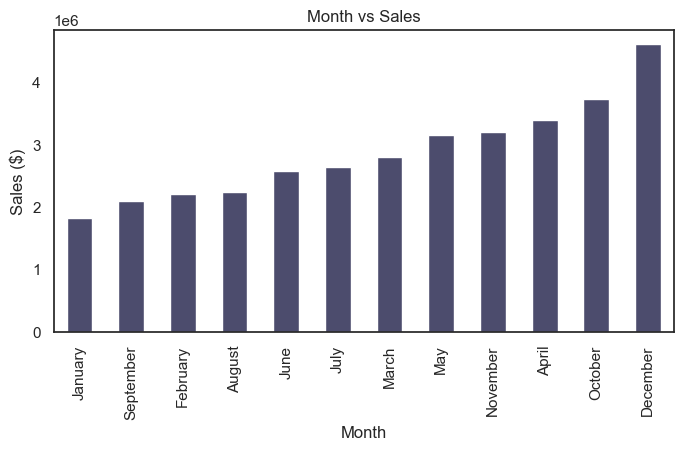

In [34]:
plt.figure(figsize=(8,4),dpi=100)
sns.set(style='white')
ax = df2.groupby('Month')['Sales'].sum().sort_values().plot(kind='bar',color='#4C4C6D')
ax.set_ylabel('Sales ($)')
ax.set_title('Month vs Sales')

#ax = df2.groupby('Month')['Sales'].sum().sort_values(ascending=False).plot(kind='pie',labels=df2.groupby('Month')['Sales'].sum().sort_values(ascending=False).index,autopct='%1.1f%%')

Thus, the best sales month was **December**

In [23]:
df2[df2['Month']=='December'].groupby('Month')['Sales'].sum()

Month
December    4613443.34
Name: Sales, dtype: float64

The sales in the month of December were **$4613443.34**

#### Q2: What city sold the most product?

Text(0.5, 1.0, 'Product Sales by city')

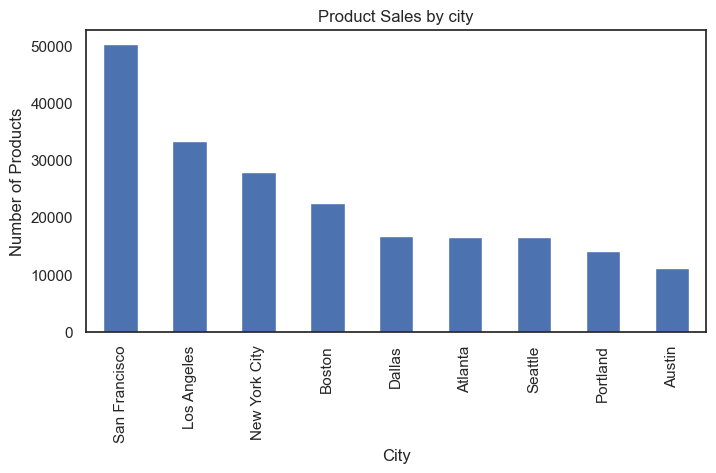

In [24]:
plt.figure(figsize=(8,4),dpi=100)
ax = df.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('Number of Products')
ax.set_title('Product Sales by city')

Thus, the city of **San Franciso** sold the highest number of products

#### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
df2['Hour'] = df2['Order Date'].dt.hour #create a new column called Hour based on the Order Date column

In [26]:
# Next we create a Series of all the Hours present in the dataframe
hours = df2.groupby(df2['Hour'])['Sales'].count().reset_index()['Hour'] 

# We create another series for the Sales count per hour
count = df2.groupby('Hour')['Sales'].count()

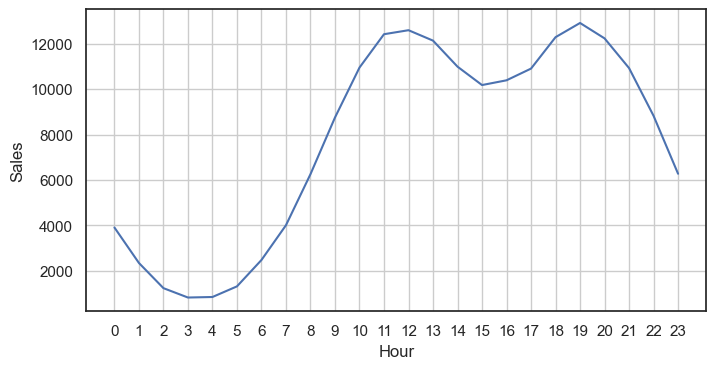

In [27]:
plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(data=df2,x=hours,y=count)
sns.set_ylabel = 'Hours'
sns.set_xlabel='No of orders'
plt.xticks(df2.groupby(df2['Order Date'].dt.hour)['Sales'].count().reset_index()['Order Date'])
plt.grid()
plt.show()

Thus, the recommended time for advertising products is around 12pm or 7pm

#### Q4: What products are most often sold together?

For this, we create a dataframe of all the duplicated values.  
Next we create a new column **Purchased Together** based on the products ordered by the same customers

In [28]:
df3 = df2[df2.duplicated(subset=['Order ID'],keep=False)]
df3['Purchased Together'] = df3.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df3 = df3[~df3.duplicated(subset=['Order ID'])]
df3.head()

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_16612\629594339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Purchased Together'] = df3.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Order Date,Quantity Ordered,Price Each,Sales,Street,City,State,Pincode,Month,Hour,Purchased Together
2,176560,Google Phone,2019-04-12 14:38:00,1,600.00,600.00,669 Spruce St,Los Angeles,CA,90001,April,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,2019-04-03 19:42:00,1,600.00,600.00,20 Hill St,Los Angeles,CA,90001,April,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,2019-04-07 11:31:00,1,99.99,99.99,823 Highland St,Boston,MA,2215,April,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2019-04-10 17:00:00,2,2.99,5.98,365 Center St,San Francisco,CA,94016,April,17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,2019-04-12 11:07:00,1,14.95,14.95,778 Maple St,New York City,NY,10001,April,11,"Lightning Charging Cable,USB-C Charging Cable"


In [29]:
df3.reset_index(inplace=True,drop=True)

In [30]:
# We create a new column displaying the number of Products purchased together by the same customer

df3['Product_count'] = df3['Purchased Together'].str.count(',') + 1

In [31]:
df3[df3['Product_count']==2]['Purchased Together'].value_counts().head(5)

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Purchased Together, dtype: int64

Thus the two products that are most often sold together are **iPhone & Lightning Charging Cable** followed by **Google Phone & USB-C Charging Cable**

In [32]:
df3[df3['Product_count']==3]['Purchased Together'].value_counts().head(5)

Google Phone,USB-C Charging Cable,Wired Headphones              77
iPhone,Lightning Charging Cable,Wired Headphones                56
iPhone,Lightning Charging Cable,Apple Airpods Headphones        43
Vareebadd Phone,USB-C Charging Cable,Wired Headphones           31
Google Phone,USB-C Charging Cable,Bose SoundSport Headphones    31
Name: Purchased Together, dtype: int64

And the three products that are most often sold together include **Google Phone,USB-C Charging Cable,Wired Headphones** followed by **iPhone,Lightning Charging Cable,Wired Headphones**

#### Q5: Which product was ordered the most number of times? What do you think is the reason for it?

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_16612\1059063425.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(products,rotation='vertical',size=9)


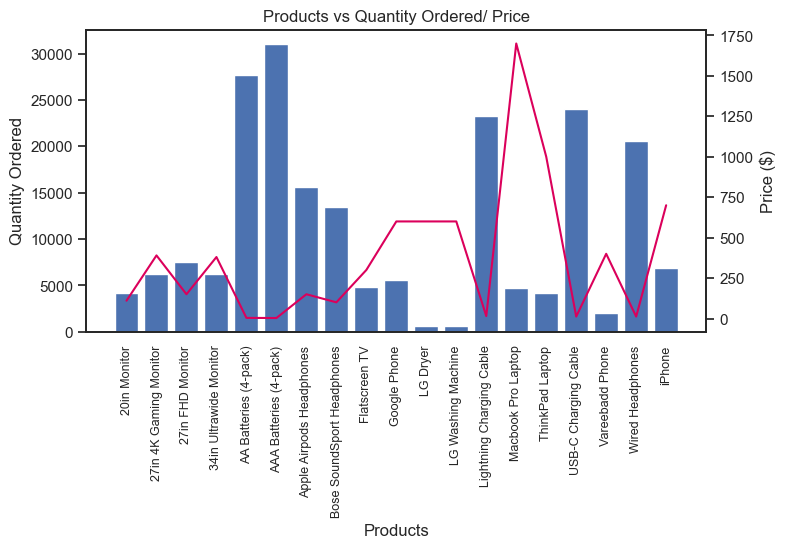

In [33]:
products = df2.groupby(['Product'])['Quantity Ordered'].sum().reset_index()['Product']
quantity = df2.groupby(['Product'])['Quantity Ordered'].sum().reset_index()['Quantity Ordered']

price = df2.groupby('Product')['Price Each'].mean()

fig, ax = plt.subplots(figsize=(8,4),dpi=100)

ax1 = ax.twinx()

ax.bar(products,quantity)
ax1.plot(products,price,color='#DB005B')
ax.set_xlabel('Products')
ax.set_ylabel('Quantity Ordered')
ax1.set_ylabel('Price ($)')
ax.set_xticklabels(products,rotation='vertical',size=9)
ax1.set_title('Products vs Quantity Ordered/ Price')
plt.show()

Thus, it can be clearly seen that the most sold product was the **AAA Batteries (4-pack)** followed by **AA Batteries (4-pack)**.  

One of the reason behind this is that these products have one of lowest prices of all